# PROMETHEUS [H2]

NOTE! Required files:

Atomic_Mass_Key; Conversions_and_Constants; Prometheus_Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.special as scisp
import pandas as pd
from scipy.constants import h, c, hbar, u, k 
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #URL data
#pip install ipynb

# SECTION [0] - Initialisation

The groundwork needed for the code, such as conversions, functions and base values. These are all stored as seperate filed that will be imported in.

## [0.1] Conversions and Constants

In [2]:
from ipynb.fs.full.Conversions_and_Constants import *

## [0.2] Functions 

In [3]:
from ipynb.fs.full.Prometheus_Functions import *

Following functions are required to be in the same notebook as the main code.

### [0.2.1] Quartic Fit 

In [4]:
def quartfit(x, eta_ii, eta_iii, eta_iiii):
    return (0.5*eta_ii*(x-X_0_au)**2) + ((1 /6)*eta_iii*(x-X_0_au)**3) + ((1/24)*eta_iiii*(x-X_0_au)**4) + E_0_au

### [0.2.2] Inclusion Function 

In [5]:
def inclusion(EX, X_0_au, method):
    upperbound = (1+method) * X_0_au
    lowerbound = (1-method) * X_0_au
    EX_spline=EX[EX[:,0]<=(upperbound), :]
    EX_spline=EX_spline[EX_spline[:,0]>=(lowerbound), :]
    p_guess = (1,1,1)
    cs =  CubicSpline(EX_spline[:,0],EX_spline[:,1])
    equidistance = np.linspace(lowerbound, upperbound, 100)
    spline_value, spline_error = curve_fit(quartfit, equidistance, cs(equidistance),p0=p_guess)
    splinerror =  np.sqrt(np.diag(spline_error))
    chi_cubicfit= quartfit(EX_spline[:,0], spline_value[0],spline_value[1],spline_value[2])
    chi_cubicfit = list(filter(lambda a: a !=  0.0, chi_cubicfit))
    chi_E_X_au = list(filter(lambda a: a !=  0.0, EX_spline[:,1]))
    chisq = chisquare(chi_cubicfit, chi_E_X_au)
    return chisq

## [0.3] Base Value - Mass

Re-enter the correct values for the selected diatomic.
Required definitions: Atomic_Mass_Key - element["X"]

In [6]:
from ipynb.fs.full.Atomic_Mass_Key import element

In [7]:
#[A.U.]
#m_A = nuclei 1, m_B = nuclei 2
m_A = element["H"]
m_A_err = element["H_err"]
m_B = element["H"] 
m_B_err = element["H_err"] 

In [8]:
#Reduced Mass - mu, SI & AU
mu_SI, mu_SI_err, mu_SI_relerr, mu_SI_pererr, mu_au, mu_au_err, mu_au_relerr, mu_au_pererr = mu(m_A, m_A_err, m_B, m_B_err) 

print("The Reduced Mass [SI]:",mu_SI,"[kg] +/-", mu_SI_pererr, "%")
print("The Reduced Mass [au]:",mu_au,"[me] +/-", mu_au_pererr, "%")

The Reduced Mass [SI]: 8.367664191576596e-28 [kg] +/- 3.904082532176144e-08 %
The Reduced Mass [au]: 918.5763236868297 [me] +/- 6.977836028297882e-08 %


## [0.4] Base Value - Temperature 

In [9]:
#Kelvin
T = 300

.

# SECTION [1] - External Data Sets

Any external data required for comparisons should be inputted here. Suggested sets: NIST, HITRAN and ExoMol. For HITRAN and NIST an url can be used.

## [1.1] ExoMol  

In [10]:
#Input URL here
#Set exomol_link = 0, if no data available
#Set exomol_link = 1, if a csv file is present (check formatting)
exomol_link = "https://exomol.com/results/1H2_2000-6000_300K_1.000000.sigma"

NOTE! The CSV names will need to be changed to the selected diatomic's name.

In [11]:
if type(exomol_link) == str:
    exomol_data = pd.read_csv(exomol_link, header=None, sep='\s+')
    exomol_data.to_csv("H2_SPEC_EXOMOL.csv")
    
    exomol_freq = exomol_data.loc[:,0]
    exomol_freq = np.array(exomol_freq)
    
    exomol_intensity = exomol_data.loc[:,1]
    exomol_intensity = np.array(exomol_intensity)
    exomol_intensity = np.divide(exomol_intensity, sum(exomol_intensity))
    
elif exomol_link == 1: 
    exomol_data = pd.read_csv("H2_SPEC_EXOMOL.csv", sep=",", header=None, skiprows=1)

    exomol_freq = exomol_data.loc[:,2]
    exomol_freq = np.array(exomol_freq)
    
    exomol_intensity = exomol_data.loc[:,3]
    exomol_intensity = np.array(exomol_intensity)
    exomol_intensity = np.divide(exomol_intensity, sum(exomol_intensity))

## [1.2] HITRAN2016 

In [12]:
#Input URL here
#Set hitran2016_link = 0, if no data available
#Set hitran2016_link = 1, if a csv file is present
#NOTE: Code will only work for the HITRAN formatting of the data on SpectralCalc
HITRAN2016_link = 0

NOTE! The CSV names will need to be changed to the selected diatomic's name.

In [13]:
if type(HITRAN2016_link) == str:
    HITRAN2016_data = pd.read_csv(HITRAN2016_link, header=None, skiprows=13, sep='\s+')     
    HITRAN2016_data.to_csv("H2_SPEC_HITRAN2016.csv")
    
    HITRAN2016_freq = HITRAN2016_data.loc[:,1]
    HITRAN2016_freq = np.array(HITRAN2016_freq)
    
    HITRAN2016_intensity = HITRAN2016_data.loc[:,2]
    HITRAN2016_intensity = np.array(HITRAN2016_intensity)
    HITRAN2016_intensity = np.divide(HITRAN2016_intensity, sum(HITRAN2016_intensity))
    
elif HITRAN2016_link == 1: 
    HITRAN2016_data = pd.read_csv("H2_SPEC_HITRAN2016.csv", sep=",", header=None, skiprows=1)

    HITRAN2016_freq = HITRAN2016_data.loc[:,2]
    HITRAN2016_freq = np.array(HITRAN2016_freq)
    
    HITRAN2016_intensity = HITRAN2016_data.loc[:,3]
    HITRAN2016_intensity = np.array(HITRAN2016_intensity)
    HITRAN2016_intensity = np.divide(HITRAN2016_intensity, sum(HITRAN2016_intensity))

## [1.3] NIST 

In [14]:
#Input the correct constants 
#from paper: 66FoRaWi
#TABLE 7 (VII)
#need to input and calculate "by hand" as this will depend on the constants/errors available
#Only simple equ.s though so should be fine to do yourself!

deltaE_NIST = 4161.1815
deltaE_NIST_err = 0.000

B_0_NIST = 59.3362
B_0_NIST_err = 0.000

B_1_NIST = 56.3712
B_1_NIST_err = 0.000

.

# SECTION [2] - PEC

## [2.1] Experimental Data 

These data sets need to be manually inputted from papers. For this one the PEC was obtained from paper (64KoWoXX)

Energy - Needs to be convered to au [Hartree]

In [15]:
#Energy [Atomic Units]
#Old 
E_raw = [-0.1202028, -0.3509282, -0.5266270, -0.6627583, -0.7696253, -0.8543531, -0.9220185, -0.9763287, -1.0200487, -1.0836362, -1.1245331, -1.1500512, -1.1649294, -1.1723414, -1.1739581, -1.1744472, -1.1744699, -1.1744701, -1.1744701, -1.1744556, -1.1740513, -1.1728492, -1.1685773, -1.1624521, -1.1550616, -1.1468425, -1.1381236, -1.1291528, -1.1201190, -1.1111659, -1.1024035, -1.0939149, -1.0857627, -1.0779927, -1.0706404, -1.0637259, -1.0572607, -1.0512547, -1.0457057, -1.0406020, -1.0359419, -1.0278471, -1.0243742]
E_au_raw = np.array(E_raw)
E_length = int(len(E_au_raw))
#print(E_length)

#Minimum Energy
E_0_au = min(E_au_raw)
index_min_E = np.argmin(E_au_raw)

#Reshaping to concatenate
E_au_raw = E_au_raw.reshape(E_length, 1)

Distance - Needs to be converted to au [Bohr]. R_e may need to be obtained from Huber and Herzberg 1950, "Molecular Spectra and Molecular Structure - VI. Constants of Diatomic Molecules"

In [16]:
#Distance [Atomic Units]
# No error associated to re
X_raw =[0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 1.,  1.1, 1.2, 1.3, 1.35, 1.39, 1.4, 1.401, 1.4011, 1.41, 1.45, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3., 3.1, 3.2, 3.3, 3.4, 3.6, 3.7]
X_au_raw = np.array(X_raw)
X_length = int(len(X_au_raw))
#print(X_length)

#Equllibirum bond length
X_0_au = X_au_raw[index_min_E]
X_0_au_err = ((X_0_au * angstrom_to_m) * bohr_to_m_err)

#Reshaping to concatenate
X_au_raw = X_au_raw.reshape(X_length, 1)

In [17]:
#Creating the joint array
E_X = np.concatenate((X_au_raw,E_au_raw), axis=1)
#print(E_X)

## [3.2] Selecting the inclusion range

As with all methodology within Prometheus, this employs spline fitting.

In [18]:
method = np.linspace(0.2,0.07,14)
range_x = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N"]

In [19]:
chisq= []

In [20]:
for i in method:
    func = inclusion(E_X, X_0_au, i)
    chisq.append(func)
    #print(chisq)

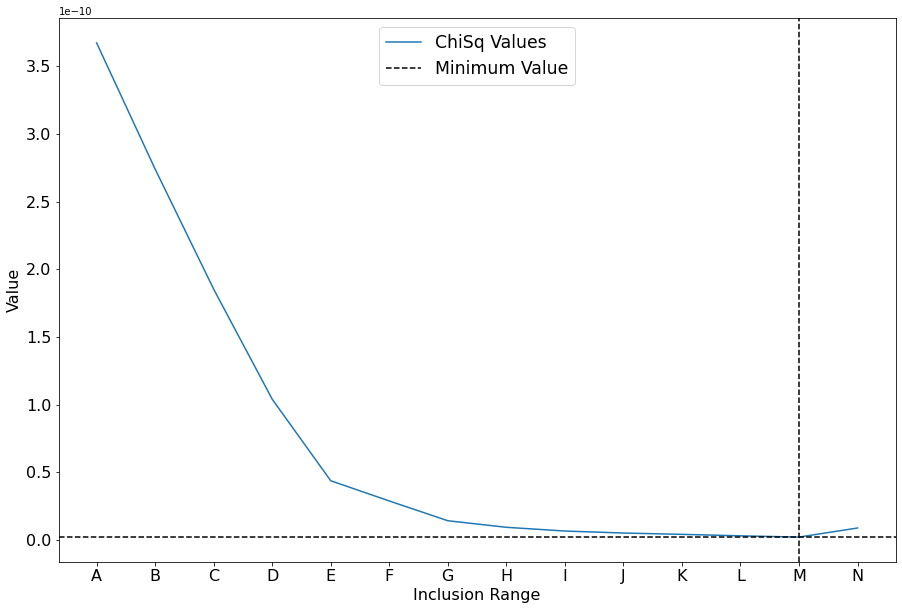

In [21]:
fig = plt.figure(figsize=(15,10))
index_inclusionrange = np.argmin(chisq)
key_range = range_x[index_inclusionrange]

plt.plot(range_x, chisq, label="ChiSq Values")
plt.axhline(min(chisq), "A", "N", c="k",ls="--", label="Minimum Value")
plt.axvline(key_range, 0, 1, c="k",ls="--")

plt.legend(loc = 'best', fontsize="xx-large")
plt.xlabel('Inclusion Range', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

## [3.3] Modelling the PEC 

In [22]:
#Creating the upper and lower bounds
inclusion_percentage = method[index_inclusionrange]
upperbound = (1+inclusion_percentage) * X_0_au
lowerbound = (1-inclusion_percentage) * X_0_au

In [23]:
E_X_au=E_X[E_X[:,0]<=(upperbound), :]

In [24]:
E_X_au=E_X_au[E_X_au[:,0]>=(lowerbound), :]

In [25]:
#Guess values for the unknown parameters
p_guess = (1,1,1)

In [26]:
#Classic Fit
#Length of the fit
l_fit = np.linspace(min(E_X_au[:,0]),max(E_X_au[:,0]),100)
#Parameters and errors from the fit
p_value, p_error = curve_fit(quartfit,E_X_au[:,0],E_X_au[:,1], p0=p_guess)
#Creating the fits energy points
quartfit_E = quartfit(l_fit,p_value[0],p_value[1],p_value[2])

In [27]:
#Cubic Spline
cs =  CubicSpline(E_X_au[:,0],E_X_au[:,1])
equidistance = np.linspace(lowerbound, upperbound, 1000)
spline_value, spline_error = curve_fit(quartfit, equidistance, cs(equidistance),p0=p_guess)
spline_quartfit = quartfit(equidistance, spline_value[0],spline_value[1],spline_value[2])

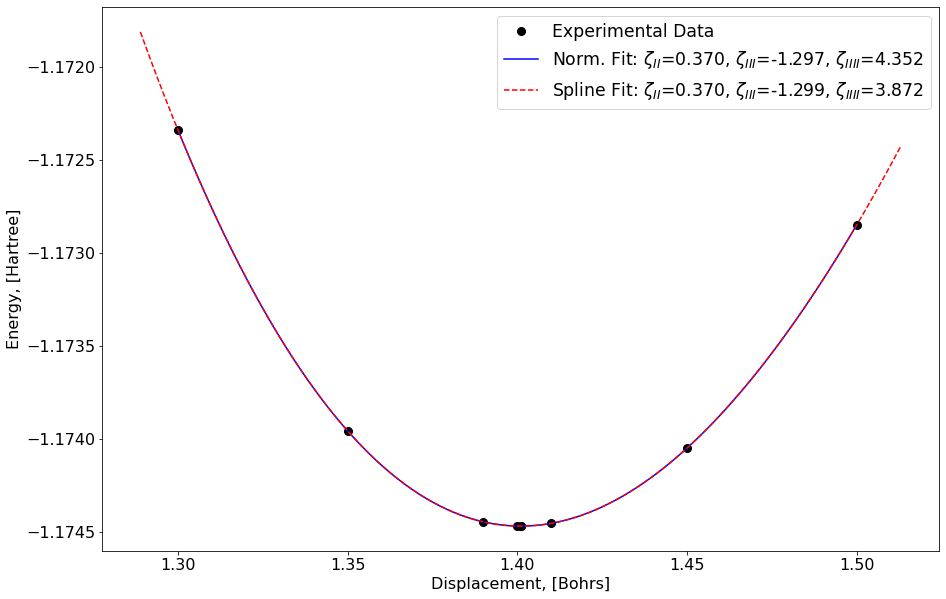

In [28]:
#Plotting
#As a side note the constants have been named zeta
#Until they have been mass weighted at which point they become eta
plt.figure(figsize=(15,10))

#Classic
plt.plot(E_X_au[:,0], E_X_au[:,1], "ko",markersize=8, label="Experimental Data")
plt.plot(l_fit, quartfit_E, "b-",markersize=10, label="Norm. Fit: $\zeta_{II}$=%5.3f, $\zeta_{III}$=%5.3f, $\zeta_{IIII}$=%5.3f"%tuple(p_value))
#print("The constants: zeta_II =", p_value[0], ", zeta_III =", p_value[1], 'zeta_IIII =', p_value[2])

#Cubic Spline
plt.plot(equidistance, spline_quartfit, "r--",markersize=1, label="Spline Fit: $\zeta_{II}$=%5.3f, $\zeta_{III}$=%5.3f, $\zeta_{IIII}$=%5.3f"%tuple(spline_value))
#print("The constants: zeta_II =", spline_value[0], ", $\zeta_{III}$ =", spline_value[1], 'zeta_IIII =', spline_value[2])

plt.legend(loc = 'best', fontsize="xx-large" )
plt.xlabel('Displacement, [Bohrs]', fontsize=16)
plt.ylabel('Energy, [Hartree]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig("Spline_vs_norm_CO_RANGEF.pdf")

plt.show()

All parameters from here are calculated using the spline curve.

In [29]:
#Associated error matrix
error = np.sqrt(np.diag(spline_error))
#print(error)

#Zeta_ii Error
zeta_ii_err =  error[0]

#Zeta_iii Error
zeta_iii_err = error[1]

#Zeta_iiii Error
zeta_iiii_err = error[2]

.

# SECTION [4] - Derived Constants

Here is where essential parameters such the frequency and rotational constants are calculated.

## [4.1] Eta(II), $\eta_{II}$

In [30]:
zeta_ii = spline_value[0]
eta_ii, eta_ii_err, eta_ii_pererr = eta_ii(zeta_ii, zeta_ii_err, mu_au, mu_au_err)

#Statements
print("Eta_ii [au] =", eta_ii,"+/-", eta_ii_err)
print("Eta_ii % Error [au] =", eta_ii_pererr, "%")

Eta_ii [au] = 0.00040320181469232695 +/- 2.986287902087e-08
Eta_ii % Error [au] = 0.007406434676802634 %


## [4.2] Eta(III), $\eta_{III}$

In [31]:
zeta_iii = spline_value[1]
eta_iii, eta_iii_err, eta_iii_pererr = eta_iii(zeta_iii, zeta_iii_err, mu_au, mu_au_err)

#Statements
print("Eta_iii [au] =", eta_iii,"+/-", eta_iii_err)
print("Eta_iii % Error [au] =", eta_iii_pererr, "%")

Eta_iii [au] = -4.665167457628999e-05 +/- 8.907130896407246e-09
Eta_iii % Error [au] = -0.019092842812836908 %


##  [4.3] Eta(IIII), $\eta_{IIII}$

In [32]:
zeta_iiii = spline_value[2]
eta_iiii, eta_iiii_err, eta_iiii_pererr = eta_iiii(zeta_iiii, zeta_iiii_err, mu_au, mu_au_err)

#Statements
print("Eta_iiii [au] =", eta_iiii,"+/-", eta_iiii_err)
print("Eta_iiii % Error [au] =", eta_iiii_pererr, "%")

Eta_iiii [au] = 4.5885418430337564e-06 +/- 4.157733067636682e-08
Eta_iiii % Error [au] = 0.9061120525573674 %


## [4.4] Omega, $\omega$

In [33]:
omega_au, omega_au_err, omega_au_pererr, omega_wn, omega_wn_err, omega_wn_pererr = omega(eta_ii, eta_ii_err)

#Statements
print("Omega [au] =", omega_au, "+/-", omega_au_err)
print("Omega % Error [au] =", omega_au_pererr, "%")
print("----------------------------------------------")
print("Omega [cm]^-1 =", omega_wn, "+/-", omega_wn_err)
print("Omega % Error [cm]^-1 =", omega_wn_pererr, "%")

Omega [au] = 0.02007988582368752 +/- 1.0537098982141521e-07
Omega % Error [au] = 0.0005247589092220476 %
----------------------------------------------
Omega [cm]^-1 = 4407.025538968903 +/- 0.02312626765905697
Omega % Error [cm]^-1 = 0.0005247591023597232 %


## [4.5] Sigma, $\sigma$

In [34]:
sigma, sigma_err, sigma_pererr = sigma(eta_iii, eta_iii_err, omega_au, omega_au_err)

#Statements
print("Sigma [au] =", sigma, "+/-", sigma_err)
print("Sigma % Error [au] =", sigma_pererr, "%")

Sigma [au] = 2.4008900881644277 +/- 0.0004961948245570314
Sigma % Error [au] = 0.020667119540503053 %


## [4.6] $\Delta E^{(TOSH)}$  

In [35]:
E_TOSH_au, E_TOSH_au_err, E_TOSH_au_pererr, E_TOSH_wn, E_TOSH_wn_err, E_TOSH_wn_pererr = E_TOSH(omega_au, omega_au_err, eta_iii, eta_iii_err, eta_iiii, eta_iiii_err, sigma, sigma_err)
    
#Statements
print("ETOSH [au]=",E_TOSH_au,"+/-", E_TOSH_au_err)
print("ETOSH % Error [au] =", E_TOSH_au_pererr, "%")
print("----------------------------------------------")
print("ETOSH [cm]^-1 =", E_TOSH_wn,"+/-", E_TOSH_wn_err)
print("ETOSH % Error [cm]^-1 =", E_TOSH_wn_pererr, "%")

ETOSH [au]= 0.01904272470147796 +/- 1.2958374530478292e-05
ETOSH % Error [au] = 0.06804895167902393 %
----------------------------------------------
ETOSH [cm]^-1 = 4179.39498400772 +/- 2.84403448121495
ETOSH % Error [cm]^-1 = 0.0680489518721616 %


## [4.7] $\Delta E^{(VPT2)}$  

In [36]:
#Normal
E_VPT2_au, E_VPT2_au_err, E_VPT2_au_pererr, E_VPT2_wn, E_VPT2_wn_err, E_VPT2_wn_pererr = E_VPT2(omega_au, omega_au_err, eta_iii, eta_iii_err, eta_iiii, eta_iiii_err, sigma, sigma_err)

#Statements
print("EVPT[2] [au] =", E_VPT2_au,"+/-", E_VPT2_au_err)
print("EVPT[2] % Error [au] =", E_VPT2_au_pererr, "%")
print("----------------------------------------------")
print("EVPT[2] [cm]^-1 =", E_VPT2_wn,"+/-",E_VPT2_wn_err)
print("EVPT[2] % Error [cm]^-1 =", E_VPT2_wn_pererr, "%")

EVPT[2] [au] = 0.018709372732015374 +/- 1.4849496927379914e-05
EVPT[2] % Error [au] = 0.07936929334872643 %
----------------------------------------------
EVPT[2] [cm]^-1 = 4106.232683395723 +/- 3.2590878719963152
EVPT[2] % Error [cm]^-1 = 0.07936929354186412 %


## [4.8] Prometheus Rotational Constant, $B_0$ 

In [37]:
B_0_wn, B_0_wn_err, B_0_wn_pererr = B_0(mu_SI, mu_SI_err, X_0_au, X_0_au_err)

print("The rot Bv for v=0 [cm]^-1 =", B_0_wn,"+/-", B_0_wn_err)
print("The rot Bv for v=0 % Error [cm]^-1=", B_0_wn_pererr, "%")

The rot Bv for v=0 [cm]^-1 = 60.864325669305416 +/- 2.376193506782153e-08
The rot Bv for v=0 % Error [cm]^-1= 3.904082532176143e-08 %


##  [4.9] Prometheus Rotational Constant, $B_1$ 

In [38]:
B_1_wn, B_1_wn_err, B_1_wn_pererr = B_1(mu_au, mu_au_err, mu_SI, mu_SI_err, X_0_au, X_0_au_err, sigma, sigma_err)

print("The rot Bv for v=1 [cm]^-1 =", B_1_wn,"+/-", B_1_wn_err)
print("The rot Bv for v=1 % Error [cm]^-1=", B_1_wn_pererr, "%")

The rot Bv for v=1 [cm]^-1 = 54.52412563520558 +/- 0.0006030769432758794
The rot Bv for v=1 % Error [cm]^-1= 0.0011060735706442577 %


.

# SECTION [5] - Rovibrational Spectra

This section will detail the method tjhat goes towards produce a full fundamental rovibrational spectrum. I will be purely using the Spline results to calculate the transition positions.

## [5.1] Boltzmann Distribution of Intensities 

In [39]:
#Finding the maximum quantum rotational number, J
J_max = round(np.sqrt((k * T)/(2*B_0_wn*h*c)) - 0.5)
J_max = int(J_max)

#Creating an array for J
J = np.linspace(0, J_max, (J_max + 1))

#Considering the spin of diatomic oxygen 
if m_A == m_B == element["O"] :
    J = [v for i, v in enumerate(J) if i % 2 == 0]
    J= np.array(J)
elif m_A == m_B != element["O"] :
    J=J
elif m_A != m_B:
    J=J

In [40]:
#Defining E_j, the rotational energy [J]
#Ground State (Ej'')
E_II_J = (J * (J + 1) * B_0_wn *  h * c_cm)

#Degeneracy
g_j = ((2*J) + 1)

#Boltzmann Distribution of the rotational energy levels
#Ground State (BD'')
B_D_II = g_j * np.exp(((-E_II_J) / (k * T)))

#The sum of all the distributions
#Ground State (Z(T)'')
Z_T_II = sum(B_D_II)

if m_A != m_B:
    Z = 2*Z_T_II
elif m_A == m_B != element["O"]:
    Z = 3*Z_T_II
elif m_A == m_B == element["O"]:
    Z = 3* (3*Z_T_II) #Rotational triplet splitting

#f_j, Normalized Intensity
#Ground State (fj'')
f_j_II = (B_D_II / Z)

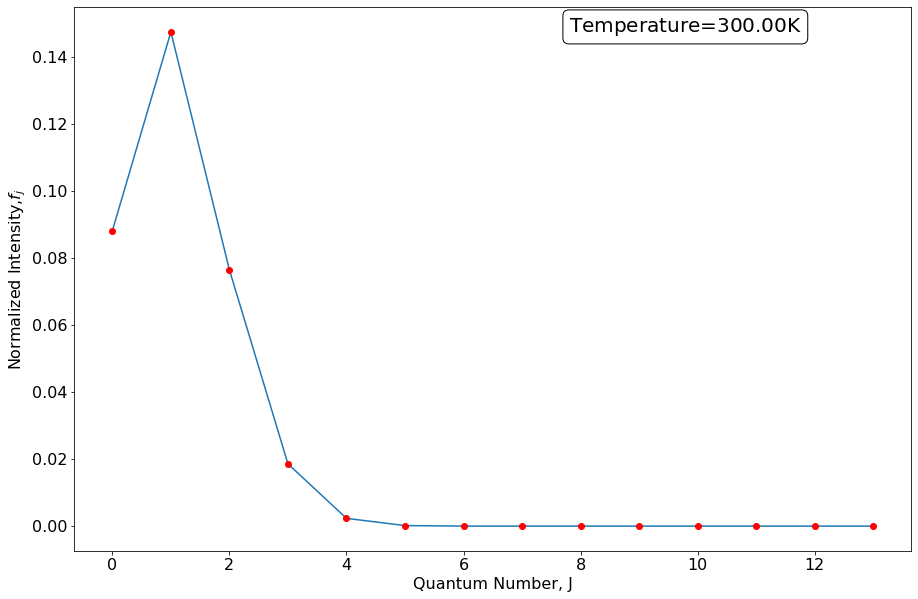

In [41]:
#Plotting the distribution
plt.figure(figsize=(15,10))
plt.plot(J, f_j_II)
plt.plot(J, f_j_II, 'ro')
plt.annotate("Temperature=$%.2f$K"%T,((0.6*max(J)),max(f_j_II)),fontsize=20,bbox=dict(boxstyle="round", fc="w", ec="k"))
plt.xlabel('Quantum Number, J',fontsize=16)
plt.ylabel('Normalized Intensity,$f_j$',fontsize=16)
plt.ylabel('Normalized Intensity,$f_j$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("Boltz_Distr_H2_300K.pdf")
plt.show()

## [5.2] Transition Positions 

### [5.2.1] Prometheus 

In [42]:
#O Branch
v_O = v_O_transition(J, E_TOSH_wn, B_0_wn , B_1_wn)
v_O_err, v_O_relerr, v_O_pererr = v_O_errors(J, E_TOSH_wn_err, B_0_wn_err, B_1_wn_err, v_O)

#P Branch
v_P = v_P_transition(J, E_TOSH_wn, B_0_wn, B_1_wn)
v_P_err, v_P_relerr, v_P_pererr = v_P_errors(J, E_TOSH_wn_err, B_0_wn_err, B_1_wn_err, v_P)

#Q Branch
v_Q = v_Q_transition(J, E_TOSH_wn, B_0_wn, B_1_wn)
v_Q_err, v_Q_relerr, v_Q_pererr = v_Q_errors(J, E_TOSH_wn_err, B_0_wn_err, B_1_wn_err, v_Q)

#R Branch
v_R = v_R_transition(J, E_TOSH_wn, B_0_wn, B_1_wn)
v_R_err, v_R_relerr, v_R_pererr = v_R_errors(J, E_TOSH_wn_err, B_0_wn_err, B_1_wn_err, v_R)

#S Branch
v_S = v_S_transition(J, E_TOSH_wn, B_0_wn, B_1_wn)
v_S_err, v_S_relerr, v_S_pererr = v_S_errors(J, E_TOSH_wn_err, B_0_wn_err, B_1_wn_err, v_S)


### [5.2.2] "NIST" 

In [43]:
#NIST 

#Branches
v_O_NIST = v_O_transition(J, deltaE_NIST, B_0_NIST, B_1_NIST)
v_P_NIST = v_P_transition(J, deltaE_NIST, B_0_NIST, B_1_NIST)
v_Q_NIST = v_Q_transition(J, deltaE_NIST, B_0_NIST, B_1_NIST)
v_R_NIST = v_R_transition(J, deltaE_NIST, B_0_NIST, B_1_NIST)
v_S_NIST = v_S_transition(J, deltaE_NIST, B_0_NIST, B_1_NIST)

#Need the rotational constant in [J]
B_0_joules_NIST = B_0_NIST * h * c_cm
B_1_joules_NIST = B_1_NIST * h * c_cm

#Defining E_j, the rotational energy [J]
#Ground State (Ej'')
E_II_J_NIST = (J * (J + 1) * B_0_joules_NIST)

#Degeneracy
g_j = ((2*J) + 1)

#Boltzmann Distribution of the rotational energy levels
#Ground State (BD'')
B_D_II_NIST = g_j * np.exp(((-E_II_J_NIST) / (k * T)))

#The sum of all the distributions
#Ground State (Z(T)'')
Z_T_II_NIST = sum(B_D_II_NIST)

if m_A != m_B:
    Z_NIST = 2*Z_T_II_NIST
elif m_A == m_B != element["O"]:
    Z_NIST = 3*Z_T_II_NIST
elif m_A == m_B == element["O"]:
    Z_NIST = 3 * (3*Z_T_II_NIST) #Rotational triplet splitting

#f_j, Normalized Intensity
#Ground State (fj'')
f_j_II_NIST = (B_D_II_NIST / Z_NIST)

#NIST "Stats"
print("NIST Key Stats")
print("delta_E_NIST [cm]^-1 =", deltaE_NIST)
print("B_0_NIST [cm]^-1 =",B_0_NIST, "+/-", B_0_NIST_err)
print("B_1_NIST [cm]^-1 =",B_1_NIST, "+/-", B_1_NIST_err)

NIST Key Stats
delta_E_NIST [cm]^-1 = 4161.1815
B_0_NIST [cm]^-1 = 59.3362 +/- 0.0
B_1_NIST [cm]^-1 = 56.3712 +/- 0.0


### [5.2.3] Harmonic 

In [44]:
#Harmonic
deltaE_HARM = omega_wn
deltaE_HARM_err = omega_wn_err
B_0_HARM = B_0_wn
B_0_HARM_err = B_0_wn_err
B_1_HARM= B_0_HARM
B_1_HARM_err = B_0_HARM_err

#Transitions
v_O_HARM = v_O_transition(J, deltaE_HARM,B_0_HARM,B_1_HARM)
v_P_HARM = v_P_transition(J, deltaE_HARM,B_0_HARM,B_1_HARM)
v_Q_HARM = v_Q_transition(J, deltaE_HARM,B_0_HARM,B_1_HARM)
v_R_HARM = v_R_transition(J, deltaE_HARM,B_0_HARM,B_1_HARM)
v_S_HARM = v_S_transition(J, deltaE_HARM,B_0_HARM,B_1_HARM)

#Need the rotational constant in [J]
B_0_joules_HARM = B_0_HARM * h * c_cm
B_1_joules_HARM = B_1_HARM * h * c_cm

#Defining E_j, the rotational energy [J]
#Ground State (Ej'')
E_II_J_HARM = (J * (J + 1) * B_0_joules_HARM)

#Degeneracy
g_j = ((2*J) + 1)

#Boltzmann Distribution of the rotational energy levels
#Ground State (BD'')
B_D_II_HARM = g_j * np.exp(((-E_II_J_HARM) / (k * T)))

#The sum of all the distributions
#Ground State (Z(T)'')
Z_T_II_HARM = sum(B_D_II_HARM)

if m_A != m_B:
    Z_HARM = 2*Z_T_II_HARM
elif m_A == m_B != element["O"]:
    Z_HARM = 3*Z_T_II_HARM
elif m_A == m_B == element["O"]:
    Z_HARM = 3* (3*Z_T_II_HARM) #Rotational triplet splitting

#f_j, Normalized Intensity
#Ground State (fj'')
f_j_II_HARM = (B_D_II_HARM / Z_HARM)

#Harmonic "Stats"
print("Harmonic Key Stats")
print("delta_E_HARM [cm]^-1 =", deltaE_HARM, "+/-", deltaE_HARM_err)
print("B_0_HARM [cm]^-1 =",B_0_HARM, "+/-", B_0_HARM_err)
print("B_1_HARM [cm]^-1 =",B_1_HARM, "+/-", B_1_HARM_err)

Harmonic Key Stats
delta_E_HARM [cm]^-1 = 4407.025538968903 +/- 0.02312626765905697
B_0_HARM [cm]^-1 = 60.864325669305416 +/- 2.376193506782153e-08
B_1_HARM [cm]^-1 = 60.864325669305416 +/- 2.376193506782153e-08


### [5.2.4] Fortrat Diagrams

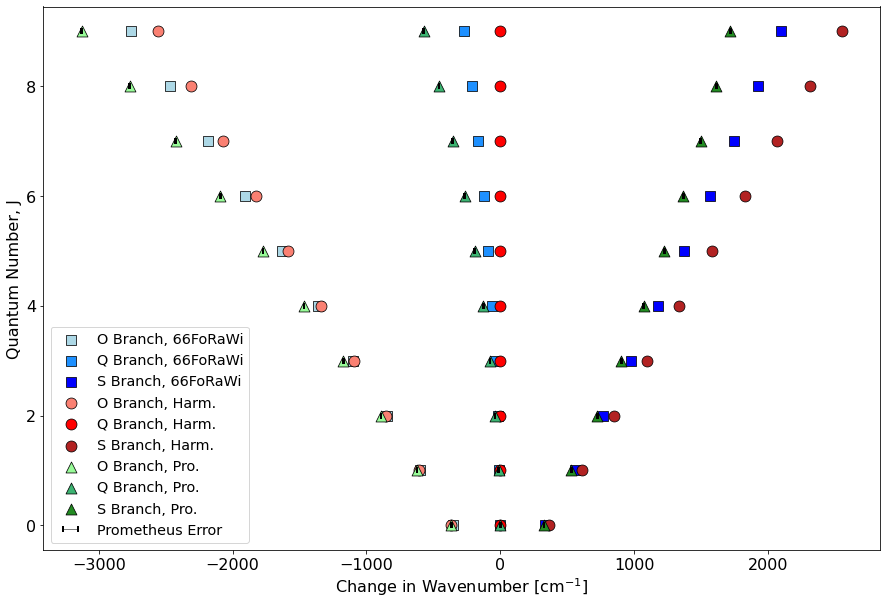

In [45]:
#FOTRAT: Plotting the branches, centred at 0
plt.figure(figsize=(15,10))

maxJ = 10
linew = 0.75
markersize= 120

if m_A != m_B:
    plt.scatter(v_P_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='lightblue', marker="s",linewidths=linew,edgecolors="k",label = 'P Branch, 66FoRaWi')
    plt.scatter(v_R_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='blue', marker="s",linewidths=linew,edgecolors="k",label = 'R Branch, 66FoRaWi')
elif m_A == m_B:   
    plt.scatter(v_O_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='lightblue', marker="s",linewidths=linew,edgecolors="k",label = 'O Branch, 66FoRaWi')
    plt.scatter(v_Q_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='dodgerblue', marker="s",linewidths=linew,edgecolors="k",label = 'Q Branch, 66FoRaWi')
    plt.scatter(v_S_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='blue', marker="s",linewidths=linew,edgecolors="k",label = 'S Branch, 66FoRaWi')

if m_A != m_B:
    plt.scatter(v_P_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='salmon',  marker="o",linewidths=linew,edgecolors="k", label = 'P Branch, Harm.')
    plt.scatter(v_R_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='firebrick',  marker="o",linewidths=linew,edgecolors="k", label = 'R Branch, Harm.')
elif m_A == m_B:
    plt.scatter(v_O_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='salmon',  marker="o",linewidths=linew,edgecolors="k", label = 'O Branch, Harm.')
    plt.scatter(v_Q_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='red',  marker="o",linewidths=linew,edgecolors="k", label = 'Q Branch, Harm.')
    plt.scatter(v_S_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='firebrick',  marker="o",linewidths=linew,edgecolors="k", label = 'S Branch, Harm.')

if m_A != m_B:
    plt.scatter(v_P[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='palegreen',  marker="^",linewidths=linew,edgecolors="k", label = 'P Branch, Pro.')
    plt.scatter(v_R[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='forestgreen',  marker="^",linewidths=linew,edgecolors="k", label = 'R Branch, Pro.')
    plt.errorbar(v_P[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_P_err[:maxJ], c='k',  fmt='none', lw=0.5, capsize=3, capthick=2, label="Prometheus Error")
    plt.errorbar(v_R[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_R_err[:maxJ], c='k', fmt='none', lw=0.5, capsize=3, capthick=2)
elif m_A == m_B:
    plt.scatter(v_O[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='palegreen',  marker="^",linewidths=linew,edgecolors="k", label = 'O Branch, Pro.')
    plt.scatter(v_Q[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='mediumseagreen',  marker="^",linewidths=linew,edgecolors="k", label = 'Q Branch, Pro.')
    plt.scatter(v_S[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='forestgreen',  marker="^",linewidths=linew,edgecolors="k", label = 'S Branch, Pro.')
    plt.errorbar(v_O[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_O_err[:maxJ], color="k",  fmt='none', lw=0.5, capsize=3, capthick=2, label="Prometheus Error")
    plt.errorbar(v_Q[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_Q_err[:maxJ], color="k", fmt='none', lw=0.5, capsize=3, capthick=2)
    plt.errorbar(v_S[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_S_err[:maxJ], color="k", fmt='none', lw=0.5, capsize=3, capthick=2)

plt.legend(loc = 'best', fontsize="x-large")

plt.xlabel('Change in Wavenumber [cm$^{-1}$]', fontsize=16)
plt.ylabel('Quantum Number, J', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("Fortrat_H2.pdf")
plt.show()

In [46]:
#Way of finding the error on the transitions without any origin error
#Creating the errors with no origin error
v_O_err_no_origin, v_O_relerr_no_origin, v_O_pererr_no_origin = v_O_errors_no_origin(J, B_0_wn_err, B_1_wn_err, v_O)
v_P_err_no_origin, v_P_relerr_no_origin, v_P_pererr_no_origin = v_P_errors_no_origin(J, B_0_wn_err, B_1_wn_err, v_P)
v_Q_err_no_origin, v_Q_relerr_no_origin, v_Q_pererr_no_origin = v_Q_errors_no_origin(J, B_0_wn_err, B_1_wn_err, v_Q)
v_R_err_no_origin, v_R_relerr_no_origin, v_R_pererr_no_origin = v_R_errors_no_origin(J, B_0_wn_err, B_1_wn_err, v_R)
v_S_err_no_origin, v_S_relerr_no_origin, v_S_pererr_no_origin = v_S_errors_no_origin(J, B_0_wn_err, B_1_wn_err, v_S)


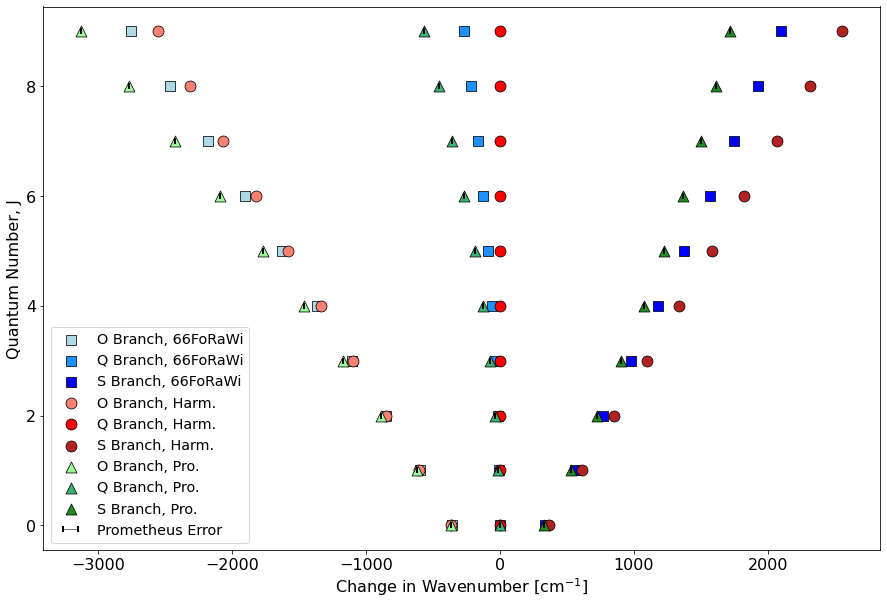

In [47]:
plt.figure(figsize=(15,10))

maxJ = 10
linew = 0.75
markersize= 120

if m_A != m_B:
    plt.scatter(v_P_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='lightblue', marker="s",linewidths=linew,edgecolors="k",label = 'P Branch, 66FoRaWi')
    plt.scatter(v_R_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='blue', marker="s",linewidths=linew,edgecolors="k",label = 'R Branch, 66FoRaWi')
elif m_A == m_B:   
    plt.scatter(v_O_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='lightblue', marker="s",linewidths=linew,edgecolors="k",label = 'O Branch, 66FoRaWi')
    plt.scatter(v_Q_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='dodgerblue', marker="s",linewidths=linew,edgecolors="k",label = 'Q Branch, 66FoRaWi')
    plt.scatter(v_S_NIST[:maxJ]-deltaE_NIST, J[:maxJ],s=markersize, c='blue', marker="s",linewidths=linew,edgecolors="k",label = 'S Branch, 66FoRaWi')

if m_A != m_B:
    plt.scatter(v_P_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='salmon',  marker="o",linewidths=linew,edgecolors="k", label = 'P Branch, Harm.')
    plt.scatter(v_R_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='firebrick',  marker="o",linewidths=linew,edgecolors="k", label = 'R Branch, Harm.')
elif m_A == m_B:
    plt.scatter(v_O_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='salmon',  marker="o",linewidths=linew,edgecolors="k", label = 'O Branch, Harm.')
    plt.scatter(v_Q_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='red',  marker="o",linewidths=linew,edgecolors="k", label = 'Q Branch, Harm.')
    plt.scatter(v_S_HARM[:maxJ]-deltaE_HARM, J[:maxJ],s=markersize, c='firebrick',  marker="o",linewidths=linew,edgecolors="k", label = 'S Branch, Harm.')

if m_A != m_B:
    plt.scatter(v_P[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='palegreen',  marker="^",linewidths=linew,edgecolors="k", label = 'P Branch, Pro.')
    plt.scatter(v_R[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='forestgreen',  marker="^",linewidths=linew,edgecolors="k", label = 'R Branch, Pro.')
    plt.errorbar(v_P[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_P_err_no_origin[:maxJ], c='k',  fmt='none', lw=0.5, capsize=3, capthick=2, label="Prometheus Error")
    plt.errorbar(v_R[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_R_err_no_origin[:maxJ], c='k', fmt='none', lw=0.5, capsize=3, capthick=2)
elif m_A == m_B:
    plt.scatter(v_O[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='palegreen',  marker="^",linewidths=linew,edgecolors="k", label = 'O Branch, Pro.')
    plt.scatter(v_Q[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='mediumseagreen',  marker="^",linewidths=linew,edgecolors="k", label = 'Q Branch, Pro.')
    plt.scatter(v_S[:maxJ]-E_TOSH_wn, J[:maxJ],s=markersize, c='forestgreen',  marker="^",linewidths=linew,edgecolors="k", label = 'S Branch, Pro.')
    plt.errorbar(v_O[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_O_err_no_origin[:maxJ], color="k",  fmt='none', lw=0.5, capsize=3, capthick=2, label="Prometheus Error")
    plt.errorbar(v_Q[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_Q_err_no_origin[:maxJ], color="k", fmt='none', lw=0.5, capsize=3, capthick=2)
    plt.errorbar(v_S[:maxJ]-E_TOSH_wn, J[:maxJ], xerr=v_S_err_no_origin[:maxJ], color="k", fmt='none', lw=0.5, capsize=3, capthick=2)

plt.legend(loc = 'best', fontsize="x-large")

plt.xlabel('Change in Wavenumber [cm$^{-1}$]', fontsize=16)
plt.ylabel('Quantum Number, J', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.savefig("Fortrat_H2_no_origin_err.pdf")
plt.show()

## [5.3] Linelists 

Some manual work required here: the xrange, extra annotations of the branches.

In [48]:
#Reshape matrices
shape_x = len(J) 
shape_y = 1

In [49]:
#Transtitions
v_O_1to0 = v_O.reshape((shape_x,shape_y))
v_P_1to0 = v_P.reshape((shape_x,shape_y))
v_Q_1to0 = v_Q.reshape((shape_x,shape_y))
v_R_1to0 = v_R.reshape((shape_x,shape_y))
v_S_1to0 = v_S.reshape((shape_x,shape_y))

v_O_1to0_NIST = v_O_NIST.reshape((shape_x,shape_y))
v_P_1to0_NIST = v_P_NIST.reshape((shape_x,shape_y))
v_Q_1to0_NIST = v_Q_NIST.reshape((shape_x,shape_y))
v_R_1to0_NIST = v_R_NIST.reshape((shape_x,shape_y))
v_S_1to0_NIST = v_S_NIST.reshape((shape_x,shape_y))

v_O_1to0_HARM = v_O_HARM.reshape((shape_x,shape_y))
v_P_1to0_HARM = v_P_HARM.reshape((shape_x,shape_y))
v_Q_1to0_HARM = v_Q_HARM.reshape((shape_x,shape_y))
v_R_1to0_HARM = v_R_HARM.reshape((shape_x,shape_y))
v_S_1to0_HARM = v_S_HARM.reshape((shape_x,shape_y))

f_j_II_PRO = f_j_II.reshape((shape_x,shape_y))
f_j_II_NIST = f_j_II_NIST.reshape((shape_x,shape_y))
f_j_II_HARM = f_j_II_HARM.reshape((shape_x,shape_y))

### [5.3.1] Plotting: PROvEXOMOLvHITRAN or PROvHITRAN or PROvEXOMOL or PRO 

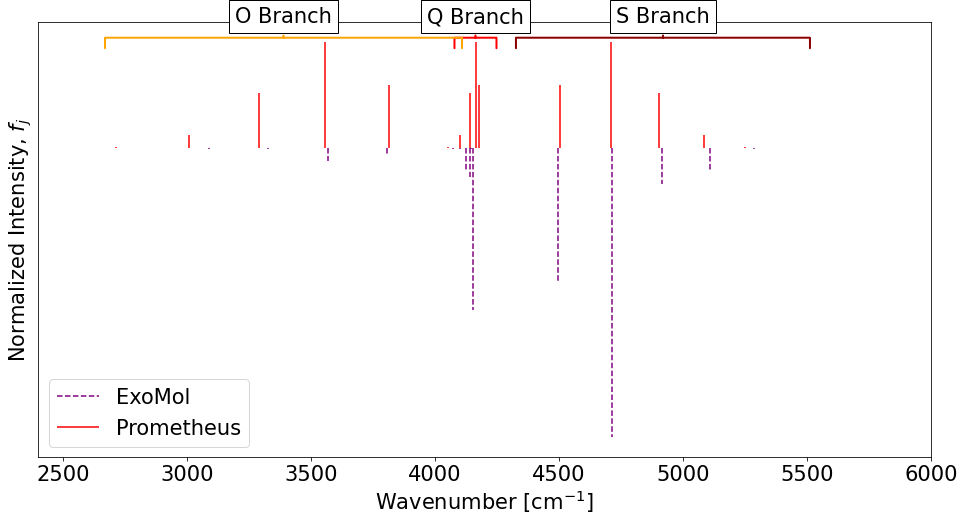

In [50]:
plt.figure(figsize=(16,8))

if HITRAN2016_link != 0:
    plt.vlines(HITRAN2016_freq,0, -HITRAN2016_intensity, color="k", label="HITRAN 2016")
    
if exomol_link != 0:
    plt.vlines(exomol_freq,0, -exomol_intensity, color="purple",linestyles="dashed", label="ExoMol")
    
if m_A != m_B:
    plt.vlines(v_P_1to0,0, f_j_II_PRO, "r",label="Prometheus")
    plt.vlines(v_R_1to0,0, f_j_II_PRO, "r")
elif m_A == m_B:
    plt.vlines(v_O_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_Q_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_S_1to0,0, f_j_II_PRO, "r", label="Prometheus")

plt.xlabel('Wavenumber [cm$^{-1}$]', fontsize=21)
plt.ylabel('Normalized Intensity, $f_j$', fontsize=21)
plt.legend(loc = 'lower left', fontsize=21)

plt.xticks(fontsize=21)
plt.yticks([])

plt.annotate('Q Branch', xy=(0.49, 0.96), xytext=(0.49, .99), xycoords='axes fraction', 
            fontsize=21, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1., lengthB=.5', lw=2.0, color="red"))
plt.annotate('O Branch', xy=(0.275, 0.96), xytext=(0.275, .99), xycoords='axes fraction', 
            fontsize=21, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=8.5, lengthB=.5', lw=2.0, color="orange"))
plt.annotate('S Branch', xy=(0.7, 0.96), xytext=(0.7, .99), xycoords='axes fraction', 
            fontsize=21, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7, lengthB=.5', lw=2.0, color="darkred"))

plt.xlim(2400,6000)

if HITRAN2016_link != 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHITRAN2016vEXOMOL.pdf")
elif HITRAN2016_link != 0 and exomol_link == 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHITRAN2016.pdf")
elif HITRAN2016_link == 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvEXOMOL.pdf")
else:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PRO.pdf")
plt.show()

### [5.3.2] #Plotting: {PROvEXOMOLvHITRAN or PROvHITRAN or PROvEXOMOL or PRO} w/ errors 

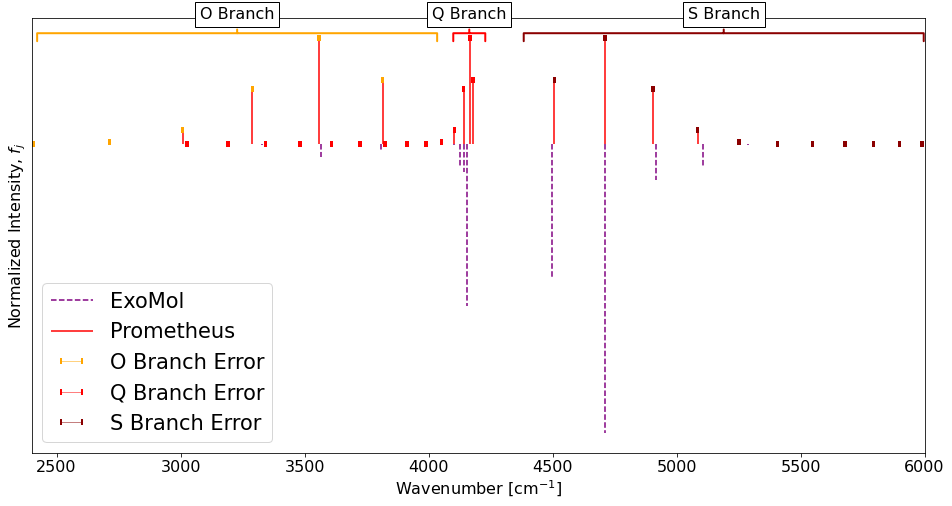

In [51]:
plt.figure(figsize=(16,8))

if HITRAN2016_link != 0:
    plt.vlines(HITRAN2016_freq,0, -HITRAN2016_intensity, color="k", label="HITRAN 2016")
    
if exomol_link != 0:
    plt.vlines(exomol_freq,0, -exomol_intensity, color="purple",linestyles="dashed", label="ExoMol")

if m_A != m_B:
    plt.vlines(v_P_1to0,0, f_j_II_PRO, "r",label="Prometheus")
    plt.vlines(v_R_1to0,0, f_j_II_PRO, "r")
    plt.errorbar(v_P_1to0, f_j_II_PRO, xerr=v_P_err, color="orange",  fmt='none', lw=0.5, capsize=3, capthick=2, label="P Branch Error")
    plt.errorbar(v_R_1to0, f_j_II_PRO, xerr=v_R_err,color="darkred", fmt='none', lw=0.5, capsize=3, capthick=2, label="R Branch Error")
elif m_A == m_B:
    plt.vlines(v_O_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_Q_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_S_1to0,0, f_j_II_PRO, "r", label="Prometheus")
    plt.errorbar(v_O_1to0, f_j_II_PRO, xerr=v_O_err, color="orange",  fmt='none', lw=0.5, capsize=3, capthick=2, label="O Branch Error")
    plt.errorbar(v_Q_1to0, f_j_II_PRO, xerr=v_Q_err,color="red", fmt='none', lw=0.5, capsize=3, capthick=2, label="Q Branch Error")
    plt.errorbar(v_S_1to0, f_j_II_PRO, xerr=v_S_err,color="darkred", fmt='none', lw=0.5, capsize=3, capthick=2, label="S Branch Error")    

plt.xlabel('Wavenumber [cm$^{-1}$]', fontsize=16)
plt.ylabel('Normalized Intensity, $f_j$', fontsize=16)
plt.legend(loc = 'lower left', fontsize=21)

plt.xticks(fontsize=16)
plt.yticks([])

plt.xlim(2400,6000)

plt.annotate('Q Branch', xy=(0.49, 0.96), xytext=(0.49, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1., lengthB=.5', lw=2.0, color="red"))
plt.annotate('O Branch', xy=(0.23, 0.96), xytext=(0.23, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="orange"))
plt.annotate('S Branch', xy=(0.775, 0.96), xytext=(0.775, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="darkred"))

if HITRAN2016_link != 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHITRAN2016vEXOMOL_with_errs.pdf")
elif HITRAN2016_link != 0 and exomol_link == 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHITRAN2016_with_errs.pdf")
elif HITRAN2016_link == 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvEXOMOL_with_errs.pdf")
else:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PRO_with_errs.pdf")
    
plt.show()

### [5.2.3] Plotting: PROvHITRANvEXOMOLvNIST or PROvNISTvEXOMOL or PROvHITRANvNIST or PROvNIST 

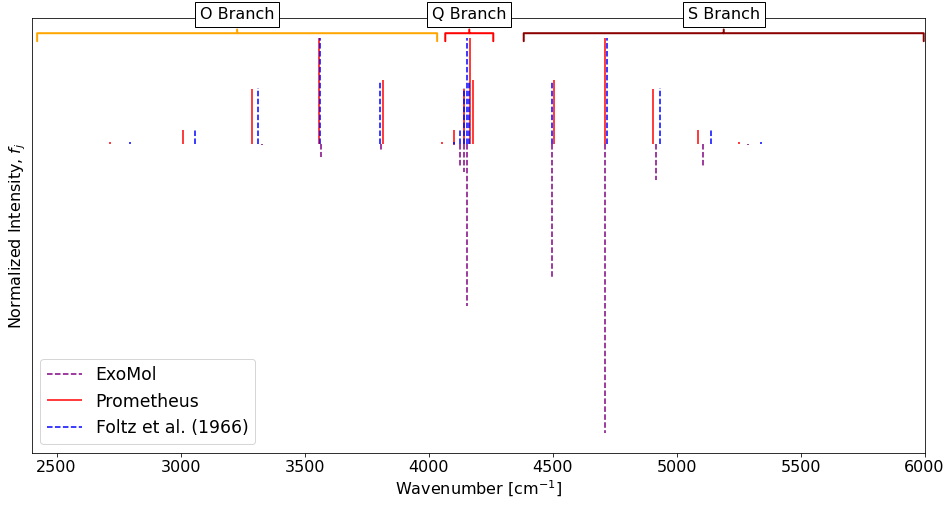

In [52]:
plt.figure(figsize=(16,8))

if HITRAN2016_link != 0:
    plt.vlines(HITRAN2016_freq,0, -HITRAN2016_intensity, color="k", label="HITRAN 2016")
    
if exomol_link != 0:
    plt.vlines(exomol_freq,0, -exomol_intensity, color="purple",linestyles="dashed", label="ExoMol")

if m_A != m_B:
    plt.vlines(v_P_1to0,0, f_j_II_PRO, "r",label="Prometheus")
    plt.vlines(v_R_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_P_1to0_NIST,0, f_j_II_NIST, "b",linestyles="dashed",  label = "Foltz et al. (1966)")
    plt.vlines(v_R_1to0_NIST,0, f_j_II_NIST, "b",linestyles="dashed")
elif m_A == m_B:
    plt.vlines(v_O_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_Q_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_S_1to0,0, f_j_II_PRO, "r", label="Prometheus")
    plt.vlines(v_O_1to0_NIST, 0,  f_j_II_NIST, "b",linestyles="dashed", label = "Foltz et al. (1966)")
    plt.vlines(v_Q_1to0_NIST, 0,  f_j_II_NIST, "b",linestyles="dashed")
    plt.vlines(v_S_1to0_NIST, 0, f_j_II_NIST, "b",linestyles="dashed")

plt.xlabel('Wavenumber [cm$^{-1}$]', fontsize=16)
plt.ylabel('Normalized Intensity, $f_j$', fontsize=16)
plt.legend(loc = 'lower left', fontsize="xx-large")

plt.xticks(fontsize=16)
plt.yticks([])

plt.xlim(2400,6000)

plt.annotate('Q Branch', xy=(0.49, 0.96), xytext=(0.49, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.5', lw=2.0, color="red"))
plt.annotate('O Branch', xy=(0.23, 0.96), xytext=(0.23, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="orange"))
plt.annotate('S Branch', xy=(0.775, 0.96), xytext=(0.775, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="darkred"))

if HITRAN2016_link != 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvNISTvHITRAN2016vEXOMOL.pdf")
elif HITRAN2016_link != 0 and exomol_link == 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvNISTvHITRAN2016.pdf")
elif HITRAN2016_link == 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvNISTvEXOMOL.pdf")
else:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvNIST.pdf")
    

plt.show()

### [5.2.4] Plotting: {PROvHITRANvEXOMOLvNIST or PROvNISTvEXOMOL or PROvHITRANvNIST or PROvNIST} w/ errors 

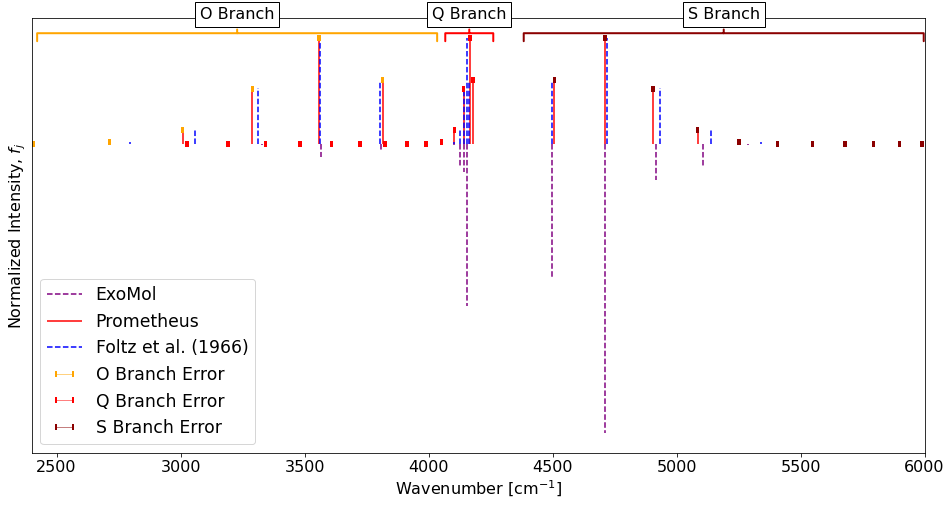

In [53]:
plt.figure(figsize=(16,8))

if HITRAN2016_link != 0:
    plt.vlines(HITRAN2016_freq,0, -HITRAN2016_intensity, color="k", label="HITRAN 2016")
    
if exomol_link != 0:
    plt.vlines(exomol_freq,0, -exomol_intensity, color="purple",linestyles="dashed", label="ExoMol")

if m_A != m_B:
    plt.vlines(v_P_1to0,0, f_j_II_PRO, "r",label="Prometheus")
    plt.vlines(v_R_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_P_1to0_NIST,0, f_j_II_NIST, "b",linestyles="dashed",  label = "Foltz et al. (1966)")
    plt.vlines(v_R_1to0_NIST,0, f_j_II_NIST, "b",linestyles="dashed")
    plt.errorbar(v_P_1to0, f_j_II_PRO, xerr=v_P_err, color="orange",  fmt='none', lw=0.5, capsize=3, capthick=2, label="P Branch Error")
    plt.errorbar(v_R_1to0, f_j_II_PRO, xerr=v_R_err,color="darkred", fmt='none', lw=0.5, capsize=3, capthick=2, label="R Branch Error")
elif m_A == m_B:
    plt.vlines(v_O_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_Q_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_S_1to0,0, f_j_II_PRO, "r", label="Prometheus")
    plt.vlines(v_O_1to0_NIST, 0,  f_j_II_NIST, "b",linestyles="dashed", label = "Foltz et al. (1966)")
    plt.vlines(v_Q_1to0_NIST, 0,  f_j_II_NIST, "b",linestyles="dashed")
    plt.vlines(v_S_1to0_NIST, 0, f_j_II_NIST, "b",linestyles="dashed")
    plt.errorbar(v_O_1to0, f_j_II_PRO, xerr=v_O_err, color="orange",  fmt='none', lw=0.5, capsize=3, capthick=2, label="O Branch Error")
    plt.errorbar(v_Q_1to0, f_j_II_PRO, xerr=v_Q_err,color="red", fmt='none', lw=0.5, capsize=3, capthick=2, label="Q Branch Error")
    plt.errorbar(v_S_1to0, f_j_II_PRO, xerr=v_S_err,color="darkred", fmt='none', lw=0.5, capsize=3, capthick=2, label="S Branch Error")

plt.xlabel('Wavenumber [cm$^{-1}$]', fontsize=16)
plt.ylabel('Normalized Intensity, $f_j$', fontsize=16)
plt.legend(loc = 'best', fontsize="xx-large")

plt.xticks(fontsize=16)
plt.yticks([])

plt.xlim(2400,6000)

plt.annotate('Q Branch', xy=(0.49, 0.96), xytext=(0.49, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.5', lw=2.0, color="red"))
plt.annotate('O Branch', xy=(0.23, 0.96), xytext=(0.23, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="orange"))
plt.annotate('S Branch', xy=(0.775, 0.96), xytext=(0.775, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="darkred"))

if HITRAN2016_link != 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvNISTvHITRAN2016vEXOMOL_with_errs.pdf")
elif HITRAN2016_link != 0 and exomol_link == 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvNISTvHITRAN2016_with_errs.pdf")
elif HITRAN2016_link == 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvNISTvEXOMOL_with_errs.pdf")
else:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvNIST_with_errs.pdf")    

plt.show()

### [5.2.5] Plotting: PROvHITRANvEXOMOLvHARM or PROvEXOMOLvHARM or PROvHITRANvHARM or PROvHARM 

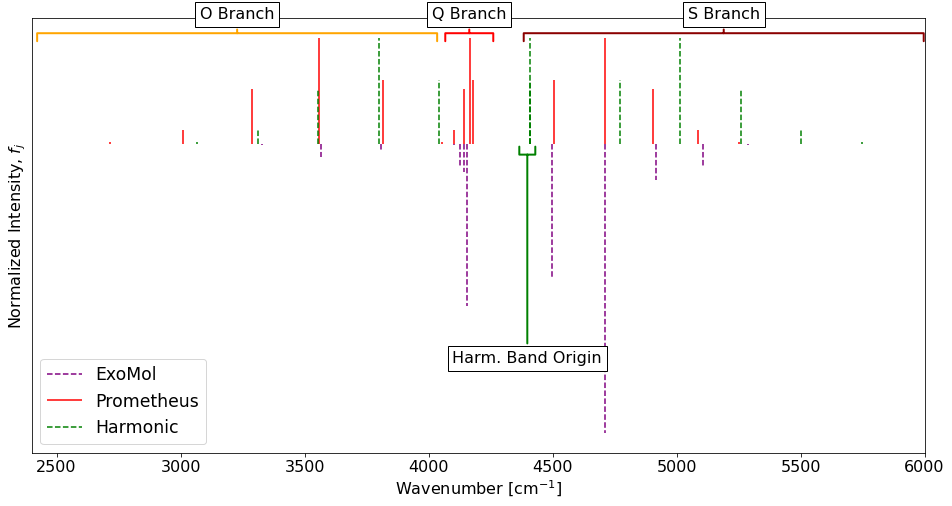

In [54]:
plt.figure(figsize=(16,8))

if HITRAN2016_link != 0:
    plt.vlines(HITRAN2016_freq,0, -HITRAN2016_intensity, color="k", label="HITRAN 2016")
    
if exomol_link != 0:
    plt.vlines(exomol_freq,0, -exomol_intensity, color="purple",linestyles="dashed", label="ExoMol")

if m_A != m_B:
    plt.vlines(v_P_1to0,0, f_j_II_PRO, "r", label="Prometheus")
    plt.vlines(v_R_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_P_1to0_HARM,0, f_j_II_HARM, "green",linestyles="dashed", label="Harmonic")
    plt.vlines(v_R_1to0_HARM,0, f_j_II_HARM, "green",linestyles="dashed")
elif m_A == m_B:
    plt.vlines(v_S_1to0,0, f_j_II_PRO, "r", label="Prometheus")
    plt.vlines(v_Q_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_O_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_O_1to0_HARM,0, f_j_II_HARM,  "green",linestyles="dashed")
    plt.vlines(v_Q_1to0_HARM,0, f_j_II_HARM,  "green",linestyles="dashed")
    plt.vlines(v_S_1to0_HARM,0, f_j_II_HARM, "green",linestyles="dashed", label="Harmonic")
    
plt.xlabel('Wavenumber [cm$^{-1}$]', fontsize=16)
plt.ylabel('Normalized Intensity, $f_j$', fontsize=16)
plt.legend(loc = 'lower left', fontsize="xx-large")
plt.xticks(fontsize=16)
plt.yticks([])

plt.xlim(2400,6000)

plt.annotate('Q Branch', xy=(0.49, 0.96), xytext=(0.49, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.5', lw=2.0, color="red"))
plt.annotate('O Branch', xy=(0.23, 0.96), xytext=(0.23, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="orange"))
plt.annotate('S Branch', xy=(0.775, 0.96), xytext=(0.775, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="darkred"))

plt.annotate('Harm. Band Origin', xy=(0.555, 0.69), xytext=(0.555, .2), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=.5, lengthB=.5', lw=2.0, color="green"))


if HITRAN2016_link != 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHARMvHITRAN2016vEXOMOL.pdf")
elif HITRAN2016_link != 0 and exomol_link == 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHARMvHITRAN2016.pdf")
elif HITRAN2016_link == 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHARMvEXOMOL.pdf")
else:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHARM.pdf")

plt.show()

### [5.2.6] Plotting: {PROvHITRANvEXOMOLvHARM or PROvEXOMOLvHARM or PROvHITRANvHARM or PROvHARM} w/ errors 

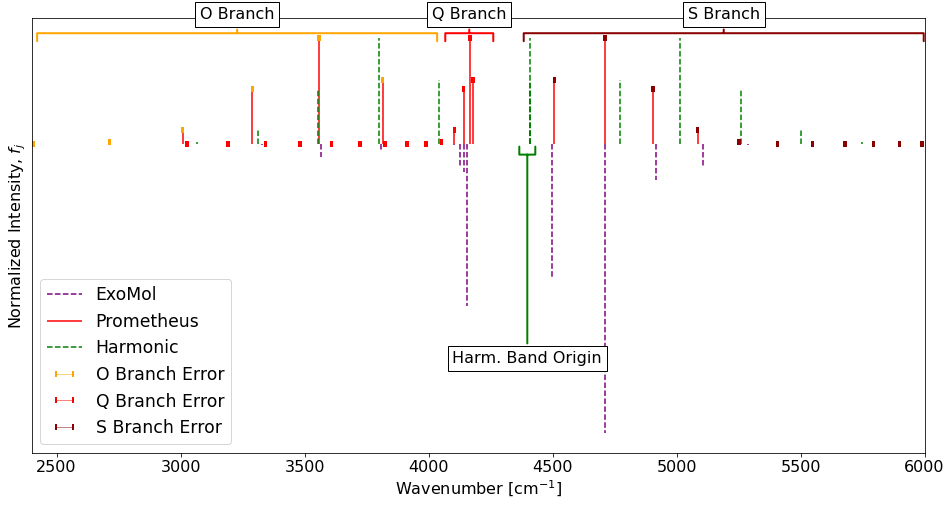

In [55]:
plt.figure(figsize=(16,8))

if HITRAN2016_link != 0:
    plt.vlines(HITRAN2016_freq,0, -HITRAN2016_intensity, color="k", label="HITRAN 2016")
    
if exomol_link != 0:
    plt.vlines(exomol_freq,0, -exomol_intensity, color="purple",linestyles="dashed",label="ExoMol")

if m_A != m_B:
    plt.vlines(v_P_1to0,0, f_j_II_PRO, "r", label="Prometheus")
    plt.vlines(v_R_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_P_1to0_HARM,0, f_j_II_HARM, "green",linestyles="dashed", label="Harmonic")
    plt.vlines(v_R_1to0_HARM,0, f_j_II_HARM, "green",linestyles="dashed")
    plt.errorbar(v_P_1to0, f_j_II_PRO, xerr=v_P_err, color="orange",  fmt='none', lw=0.5, capsize=3, capthick=2, label="P Branch Error")
    plt.errorbar(v_R_1to0, f_j_II_PRO, xerr=v_R_err,color="darkred", fmt='none', lw=0.5, capsize=3, capthick=2, label="R Branch Error")

elif m_A == m_B:
    plt.vlines(v_S_1to0,0, f_j_II_PRO, "r", label="Prometheus")
    plt.vlines(v_Q_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_O_1to0,0, f_j_II_PRO, "r")
    plt.vlines(v_O_1to0_HARM,0, f_j_II_HARM,  "green",linestyles="dashed")
    plt.vlines(v_Q_1to0_HARM,0, f_j_II_HARM,  "green",linestyles="dashed")
    plt.vlines(v_S_1to0_HARM,0, f_j_II_HARM, "green",linestyles="dashed", label="Harmonic")
    plt.errorbar(v_O_1to0, f_j_II_PRO, xerr=v_O_err, color="orange",  fmt='none', lw=0.5, capsize=3, capthick=2, label="O Branch Error")
    plt.errorbar(v_Q_1to0, f_j_II_PRO, xerr=v_Q_err,color="red", fmt='none', lw=0.5, capsize=3, capthick=2, label="Q Branch Error")
    plt.errorbar(v_S_1to0, f_j_II_PRO, xerr=v_S_err,color="darkred", fmt='none', lw=0.5, capsize=3, capthick=2, label="S Branch Error")
    
plt.xlabel('Wavenumber [cm$^{-1}$]', fontsize=16)
plt.ylabel('Normalized Intensity, $f_j$', fontsize=16)
plt.legend(loc = 'lower left', fontsize="xx-large")
plt.xticks(fontsize=16)
plt.yticks([])

plt.xlim(2400,6000)

plt.annotate('Q Branch', xy=(0.49, 0.96), xytext=(0.49, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.5', lw=2.0, color="red"))
plt.annotate('O Branch', xy=(0.23, 0.96), xytext=(0.23, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="orange"))
plt.annotate('S Branch', xy=(0.775, 0.96), xytext=(0.775, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12.5, lengthB=.5', lw=2.0, color="darkred"))

plt.annotate('Harm. Band Origin', xy=(0.555, 0.69), xytext=(0.555, .2), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=.5, lengthB=.5', lw=2.0, color="green"))


if HITRAN2016_link != 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHARMvHITRAN2016vEXOMOL_with_errs.pdf")
elif HITRAN2016_link != 0 and exomol_link == 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHARMvHITRAN2016_with_errs.pdf")
elif HITRAN2016_link == 0 and exomol_link != 0:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHARMvEXOMOL_with_errs.pdf")
else:
    plt.savefig("H2_Rovibe_Spectrum_Fundamental_PROvHARM_with_errs.pdf")

plt.show()

## [5.3] Recording the data 

In [56]:
if m_A != m_B:
    Pos = np.concatenate((v_P, v_R))
    Pos = np.reshape(Pos, (len(Pos),1))
    Int = np.concatenate((f_j_II, f_j_II))
    Int = np.reshape(Int, (len(Int),1))
    Pos_and_Int = np.concatenate((Pos,Int), axis=1)
    np.savetxt("H2_SPEC_PRO.csv", Pos_and_Int, delimiter=",")
    #Quick double check of the data saved
    plt.figure(figsize=(16,8))
    plt.vlines(Pos_and_Int[:,0],0,Pos_and_Int[:,1])

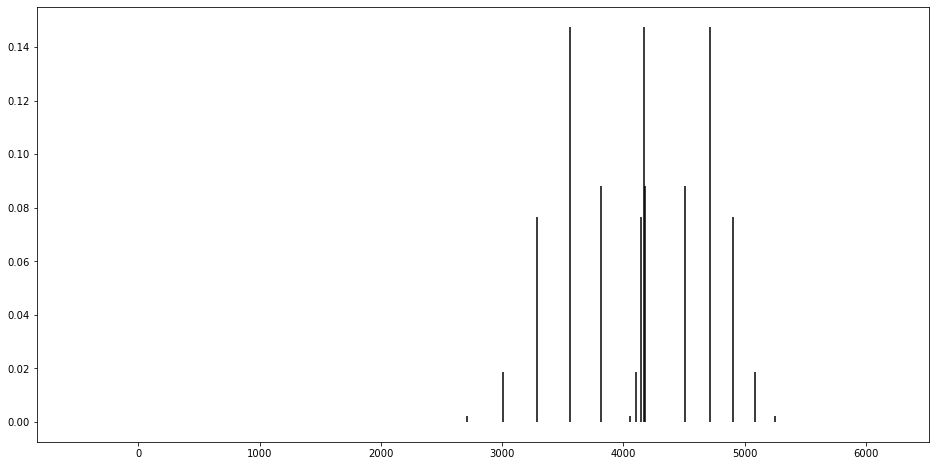

In [57]:
if m_A == m_B:
    Pos = np.concatenate((v_O, v_Q, v_S))
    Pos = np.reshape(Pos, (len(Pos),1))
    Int = np.concatenate((f_j_II, f_j_II, f_j_II))
    Int = np.reshape(Int, (len(Int),1))
    Pos_and_Int = np.concatenate((Pos,Int), axis=1)
    np.savetxt("H2_SPEC_PRO.csv", Pos_and_Int, delimiter=",")
    #Quick double check of the data saved
    plt.figure(figsize=(16,8))
    plt.vlines(Pos_and_Int[:,0],0,Pos_and_Int[:,1])

.